In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

import tensorflow_probability as tfp

tfd = tfp.distributions
psd_kernels = tfp.positive_semidefinite_kernels

In [8]:
kernel = psd_kernels.ExponentiatedQuadratic()
index_points = np.linspace(-1, 1, 100).reshape(-1, 1)

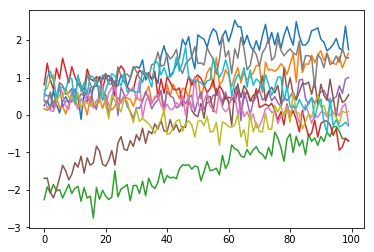

In [9]:
gp = tfd.GaussianProcess(kernel, index_points)
samples = gp.sample(10)

noisy_gp = tfd.GaussianProcess(kernel, index_points, observation_noise_variance=0.05)
noisy_samples = noisy_gp.sample(10)

plt.plot(noisy_samples.numpy().T)
plt.show()

In [10]:
f = lambda x: np.sin(10*x[..., 0]) * np.exp(-x[..., 0]**2)
observed_index_points = np.expand_dims(np.random.uniform(-1., 1., 50), -1)
observed_values = f(observed_index_points)

In [11]:
x = tf.Variable(1., dtype=tf.float64)

with tf.GradientTape() as t:
    t.watch(x)
    
    y = x*x + x*3 + 4

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
t.gradient(y, x)

<tf.Tensor: id=847, shape=(), dtype=float64, numpy=5.0>

In [13]:
optimizer = tf.train.AdamOptimizer()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(1000):
        _, nll_ = sess.run([optimize, nll])
    
        if i % 100 == 0:
            print("Step {}: NLL = {}".format(i, nll_))
            
    print("Final NLL = {}".format(nll_))

NameError: name 'optimize' is not defined

Step 0: NLL = 4571637.07293823
Step 100: NLL = 3252808.7560611875
Step 200: NLL = 2312532.457705238
Step 300: NLL = 1837805.5407720706
Step 400: NLL = 1180296.4087447235
Step 500: NLL = 257345.19944702554
Step 600: NLL = 105474.57357911639
Step 700: NLL = 57365.191187843884
Step 800: NLL = 32483.004469086096
Step 900: NLL = 19106.45212404674
1.364530635274938 0.43549341394099517


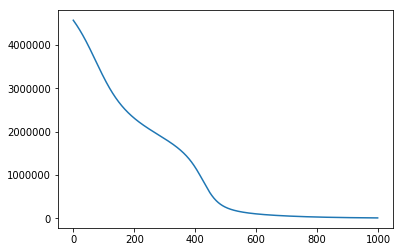

In [14]:

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
optimizer = tf.train.AdamOptimizer()

length_scale = tf.Variable(1., dtype=tf.float64)
amplitude = tf.Variable(1., dtype=tf.float64)
variables = [amplitude, length_scale]


ll = []

for i in range(1000):
    with tf.GradientTape() as t:
        kernel = psd_kernels.ExponentiatedQuadratic(length_scale=length_scale, amplitude=amplitude)
        gp = tfd.GaussianProcess(kernel, observed_index_points)
        neg_log_likelihood = -gp.log_prob(observed_values)

    grad = t.gradient(neg_log_likelihood, variables)

    optimizer.apply_gradients(zip(grad, variables))

    if i % 100 == 0:
        print("Step {}: NLL = {}".format(i, neg_log_likelihood))
    ll.append(neg_log_likelihood)
    
plt.plot(ll)
print(amplitude.numpy(), length_scale.numpy())

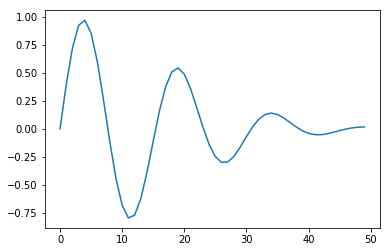

In [15]:
plt.plot(f(np.linspace(0,2).reshape(-1, 1)))